In [2]:
def affine2(f,T,domain=0):
    '''
    affine, porém colocando zeros nos pixels que caem fora da imagem de entrada
    '''
    
    import numpy as np
    
    # Get domain and image dimentions (in that case they are the same)
    domain = f.shape
    H,W = domain
    
    # Create indices vectors
    rr,cc = np.indices(domain)
    rr = rr.ravel();
    cc = cc.ravel();
    
    g = np.zeros(domain)
    
    # Concatenate indeces
    rrcc1 = np.concatenate([ [rr], [cc], [np.ones(rr.size),] ], axis=0)
    
    # Apply inverse transformation
    Mrrcc = np.linalg.inv(T).dot(rrcc1) 
    
    # Interpolating indeces and gettin them
    r = np.rint(Mrrcc[0,:]).astype(int)
    c = np.rint(Mrrcc[1,:]).astype(int)

    # Matrix reduction for 2D-matrix instead of 2D-Array
    if (len(r.shape)>1):
        r = np.squeeze(np.asarray(r))
        c = np.squeeze(np.asarray(c))
        
    # Get new indeces within domain
    idx = (r>=0) & (r<H) & (c>=0) & (c<W)
    
    # Create output Image
    g[rr[idx], cc[idx]] = f[r[idx],c[idx]]
       
    return g

In [3]:
testing = (__name__ == "__main__")

if testing:
    ! jupyter nbconvert --to 'python' affine2
    import sys,os
    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
    if path not in sys.path:
        sys.path.append(path)
    import affine2 as aff2
    import affine_direta as aff1

[NbConvertApp] Converting notebook affine2.ipynb to python
[NbConvertApp] Writing 4280 bytes to affine2.py


## Examples

### Example 1

#### Caso numérico

In [4]:
if testing:
    import numpy as np
    f = np.arange(1,26).reshape(5,5)
    T1 = np.array([[1, 0, -2], [0, 1, 1], [0,0,1]])
    angle = np.pi/4
    T2 = np.array([[np.cos(angle), -np.sin(angle), -1], [np.sin(angle), np.cos(angle), 1], [0,0,1]])
    g1 = aff2.affine2(f,T1)
    g2 = aff2.affine2(f,T2)

    print("Imagem original:\n",f)
    print("\nTransformação 1 - translação de (-2,1):\n",T1)
    print("Resulta 1:\n",g1)

    print("\nTransformação 2 - rotação de 30 graus e translação de (-1,1):\n",T2)
    print("Resulta 2:\n",g2)

Imagem original:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Transformação 1 - translação de (-2,1):
 [[ 1  0 -2]
 [ 0  1  1]
 [ 0  0  1]]
Resulta 1:
 [[  0.  11.  12.  13.  14.]
 [  0.  16.  17.  18.  19.]
 [  0.  21.  22.  23.  24.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]

Transformação 2 - rotação de 30 graus e translação de (-1,1):
 [[ 0.70710678 -0.70710678 -1.        ]
 [ 0.70710678  0.70710678  1.        ]
 [ 0.          0.          1.        ]]
Resulta 2:
 [[  0.   0.   6.  12.  17.]
 [  0.   0.   0.  16.  22.]
 [  0.   0.   0.   0.  21.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


### Example 2

#### teste com Imagens

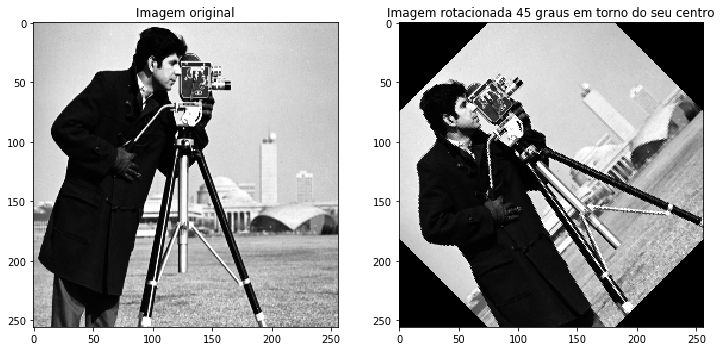

In [5]:
if testing:
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    H,W = f.shape
    
    
    #desloca a imagem para o centro da rotação
    T1 = np.array([[1,0, -H/2], [0, 1, -W/2], [0,0,1]]) 
    angle = np.pi/4
    
    #rotaciona a imagem
    T2 = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0,0,1]])
    
    #reposicionada a imagem para sua origem
    T3 = np.array([[1,0, H/2], [0, 1, W/2], [0,0,1]]) 
    
    #Matrix de transformação resultandte é o produto das 3 matrizes utilizada para cada operação
    T = T3.dot(T2.dot(T1)) 
    g1 = aff2.affine2(f,T)
    
    plt.figure(1,figsize=[12,12])
    plt.subplot(121)
    plt.imshow(f,cmap="gray")
    plt.title('Imagem original')
    plt.subplot(122)
    plt.imshow(g1,cmap="gray")
    plt.title('Imagem rotacionada 45 graus em torno do seu centro')
    

### Example 3

#### Comparação entra a transformação direta e inversa

tempo da affine direta: 
:
100 loops, best of 3: 4.62 ms per loop

tempo da affine inversa: 
:
100 loops, best of 3: 4.54 ms per loop


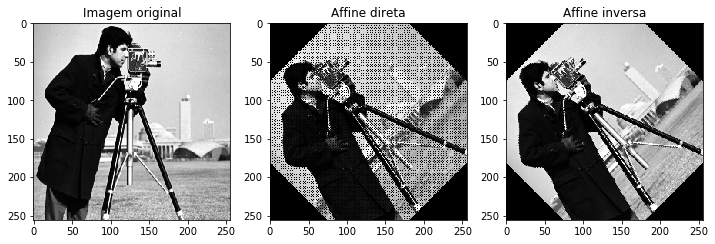

In [6]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    H,W = f.shape
    T1 = np.array([[1,0, -H/2], [0, 1, -W/2], [0,0,1]]) 
    angle = np.pi/4
    
    #rotaciona a imagem
    T2 = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0,0,1]])
    
    #reposicionada a imagem para sua origem
    T3 = np.array([[1,0, H/2], [0, 1, W/2], [0,0,1]]) 
    
    #Matrix de transformação resultandte é o produto das 3 matrizes utilizada para cada operação
    T = T3.dot(T2.dot(T1)) 
    g2 = aff2.affine2(f,T)
    g1 = aff1.affine_direta(f,T)
    
    print("tempo da affine direta: \n:")
    %timeit aff1.affine_direta(f,T)
    
    print("\ntempo da affine inversa: \n:")
    %timeit aff2.affine2(f,T)
    
    
    plt.figure(1,figsize=[12,12])
    plt.subplot(131)
    plt.imshow(f,cmap="gray")
    plt.title('Imagem original')
    plt.subplot(132)
    plt.imshow(g1,cmap="gray")
    plt.title('Affine direta')
    plt.subplot(133)
    plt.imshow(g2,cmap="gray")
    plt.title('Affine inversa')